In [1]:
from __future__ import division
%matplotlib inline 

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.datasets.samples_generator import make_regression

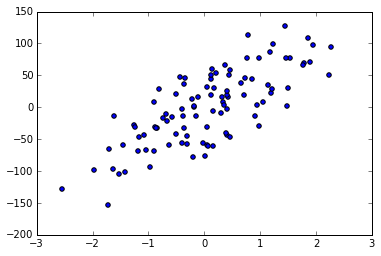

In [3]:
# randomly generate a regression sample dataset
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, random_state=0, noise=35) 
plt.scatter(x, y)
plt.show()

In [5]:
def gradient_descent(x, y, alpha=0.01, iterations=1000, stop=0.0001):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    m = len(x)
    
    initial_loss = sum([(theta0 + (theta1 * x[i]) - y[i])**2 for i in xrange(m)])
    
    for n in xrange(iterations):    
        g0 = (1/m) * sum([(theta0 + theta1 * x[i] - y[i]) for i in xrange(m)])
        g1 = (1/m) * sum([(theta0 + theta1 * x[i] - y[i]) * x[i] for i in xrange(m)])
        
        theta0 = theta0 - alpha * g0
        theta1 = theta1 - alpha * g1
        
        loss = sum([(theta0 + theta1 * x[i] - y[i])**2 for i in xrange(m)])
        
        if abs(initial_loss - loss) <= stop:
            return theta0, theta1
        
        if n % 100 == 0:
            print 'theta0 {}, theta1 {}, loss{} '.format(theta0, theta1, loss)
        
        inital_loss = loss
    
    print 'max iterations'
    return theta0, theta1

In [6]:
theta0, theta1 = gradient_descent(x, y)
print 'y = {:.2f} + {:.2f}x'.format(theta0[0], theta1[0])

theta0 [ 0.17162412], theta1 [ 1.11720274], loss[ 319820.78642206] 
theta0 [-0.81953694], theta1 [ 28.00436316], loss[ 163455.03006961] 
theta0 [-1.77215182], theta1 [ 37.69417927], loss[ 143000.14386947] 
theta0 [-2.33379442], theta1 [ 41.19932193], loss[ 140284.07978614] 
theta0 [-2.61654955], theta1 [ 42.47200973], loss[ 139918.11901065] 
theta0 [-2.74812076], theta1 [ 42.93583926], loss[ 139868.11906699] 
theta0 [-2.80653024], theta1 [ 43.10550636], loss[ 139861.19928576] 
theta0 [-2.83166622], theta1 [ 43.16779523], loss[ 139860.2304422] 
theta0 [-2.84224824], theta1 [ 43.19074389], loss[ 139860.09340009] 
theta0 [-2.84663141], theta1 [ 43.19922765], loss[ 139860.0738438] 
max iterations
y = -2.85 + 43.20x


In [7]:
# sklearn check
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x, y)

print 'y = {:.2f} + {:.2f}x'.format(regr.intercept_, regr.coef_[0])

y = -2.85 + 43.20x


In [8]:
regr.score(x, y)

0.57550620491972371

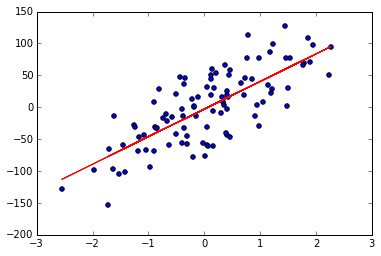

In [9]:
plt.scatter(x, y)
plt.plot(x, theta0 + theta1*x, 'r-')
plt.show()

In [10]:
def mean_squared_error(x, y, t0=0.0, t1=0.0):
    m = len(x)  # number of samples
    return sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)]) / (2 * m)

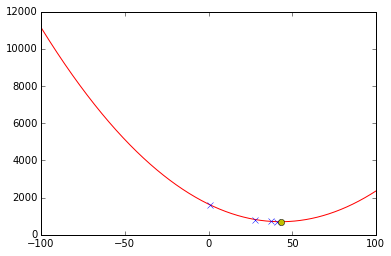

In [11]:
xx = np.linspace(-100, 100, 1000)   #
loss_ = np.array([mean_squared_error(x, y, t1=i) for i in xx])

plt.plot(xx, loss_, '-r')
for point in [1, 28, 37, 41]:
    plt.plot(point, mean_squared_error(x, y, t1=point), 'xb')
    
plt.plot(43.20, mean_squared_error(x, y, t1=43.20), 'oy')
plt.show()

In [113]:
def compute_gradient_n(x, y, alpha=0.01, iterations=1000, stop=0.0001):
    m = len(x)
    
    gradient = []
    
    a = np.ones(shape=(len(x), 1))  
    x_ = np.hstack((a, x))
    theta = np.random.rand(x_.shape[1])
    initial_loss = np.sum((np.sum(theta * x_, axis=1) - y) ** 2)
    
    for n in xrange(iterations):    
        g = (1/m) * ((np.sum(theta * x_, axis=1) - y) * x_.T).sum(axis=1)
#         if n % 100 == 0:
#             print 'n: {}, theta: {}'.format(n, theta)
        
        
        theta = theta - alpha * g
        loss = np.sum((np.sum(theta * x_, axis=1) - y) ** 2)
        
        if np.abs(initial_loss - loss) <= stop:
            print 'converged with {} iterations'.format(n)
            return theta, gradient
        
        initial_loss = loss
        gradient.append([n, initial_loss])
        
    print 'max iterations reached'
    return theta, gradient

In [139]:
theta, gradient = compute_gradient_n(x, y, iterations=2000, alpha=0.5)
print theta

converged with 20 iterations
[ -7.25803507e+00   4.61920786e+01  -2.92508201e-02  -8.34413812e+00
   2.06912901e+00  -2.40186320e+00]


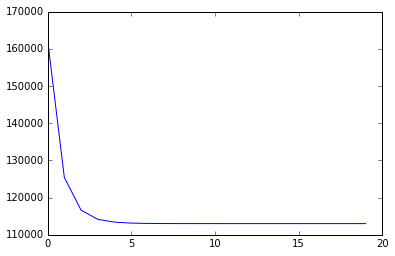

In [140]:
x_axes, y_axes = zip(*gradient)
plt.plot(x_axes, [ax for ax in y_axes])
plt.show()

In [142]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x, y)

print '{} {}'.format(regr.intercept_, regr.coef_)

-7.25844788765 [  4.61922854e+01  -2.95938536e-02  -8.34444230e+00   2.06984007e+00
  -2.40198344e+00]
